In [7]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import time
import pandas as pd
import json
import os
import random
from scipy.stats import norm


9.592326932761352e-17 1.0509000903987018
9.681144774731365e-17 1.609792222617565
2.1316282072803006e-17 1.089557708430352
-1.4210854715202004e-17 1.4371416074973267
9.947598300641403e-17 1.5287956043892854


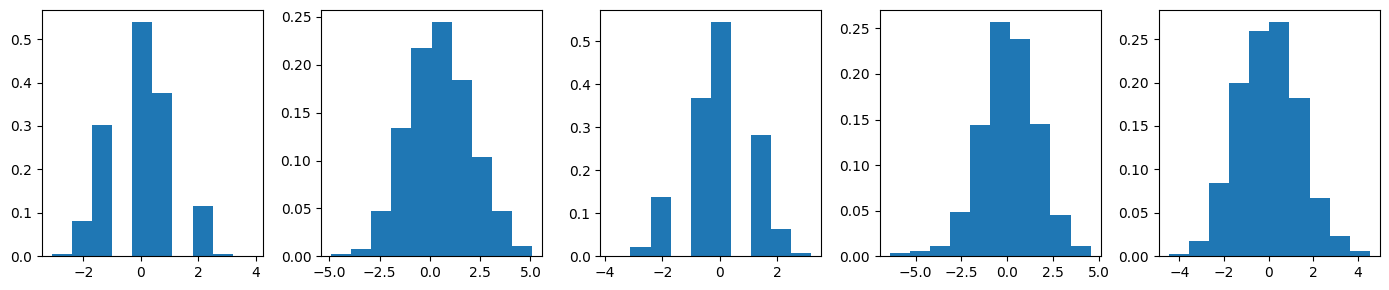

In [8]:
fig, ax = plt.subplots(1, 5, figsize=(14, 3))
i = 0
all = []
for file in os.listdir('../../dat/noise/'):
    if file.endswith('.npy'):
        counter = np.load(f'../../dat/noise/{file}')
        counter = counter[:1000]
        counter_zero = counter - counter.mean()

        ax[i].hist(counter_zero, density=True)
        
        all.append(counter_zero)
        print(counter_zero.mean(), counter_zero.std())
        i += 1
all = np.concatenate(all).round(2)
plt.tight_layout()
plt.show()

<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
C:\Users\David\AppData\Local\Temp\ipykernel_16672\3929748600.py:20: SyntaxWarning: invalid escape sequence '\s'
  ax.axvline(std, color='red', linestyle='--', label=f'$\sigma$={std:.2f} nm')


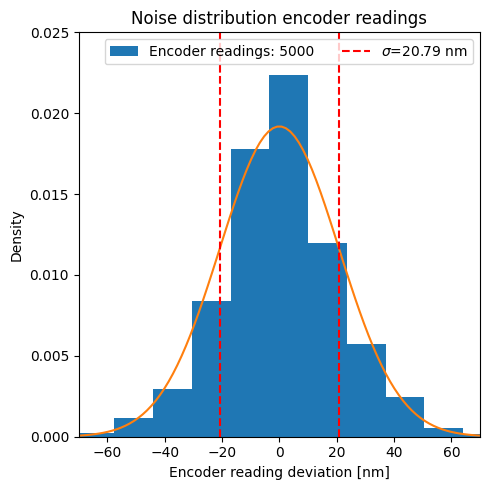

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
std = all.std()*np.power(10, 6)/np.power(2, 16)
readings_count = len(all)

ax.hist(all*np.power(10, 6)/np.power(2, 16), density=True, bins=13, label=f'Encoder readings: {readings_count}')

x = np.linspace(-75, 75, 100)
p = norm.pdf(x, 0, std)
ax.plot(x, p)

ax.set_title(f'Noise distribution encoder readings')
ax.set_xlim(-70, 70)
ax.set_ylim(0, 0.025)
# set x ticks at 0 and every 20
# ax.set_xticks([-60, -40, -20, 0, 20, 40, 60])
ax.set_xlabel('Encoder reading deviation [nm]')
ax.set_ylabel('Density')

# plot the standard deviation
ax.axvline(std, color='red', linestyle='--', label=f'$\sigma$={std:.2f} nm')
ax.axvline(-std, color='red', linestyle='--')

# set legend columns to 5
ax.legend(ncol=5)

plt.tight_layout()
plt.savefig('./fig_noise_distribution.pdf')